In [8]:
from alpha_models.mean_reversion import MeanReversionStrategy
from ml_models.eda import EDA
from backtesting.backtester import Backtester
import matplotlib.pyplot as plt
print("Alpha and ML modules are ready to use!")

Alpha and ML modules are ready to use!


In [9]:
# Initialize the EDA instance to load data from the database
eda_instance = EDA()
data = eda_instance.load_data_from_db(db_path="../quant_pipeline.db", table_name="price_data")
eda_instance.clean_data()

# Print DataFrame headers (column names)
print("DataFrame Columns:")
print(data.columns)

# Print the first 5 rows of the DataFrame
print("\nFirst 5 Rows:")
print(data.head())

# Now that the data is prepared, instantiate the mean reversion strategy.
strategy = MeanReversionStrategy(window=20, threshold=0.05)

# Generate signals using the strategy (this assumes your strategy has a method like generate_signals)
signals = strategy.generate_signals(data)
print("Generated Signals:")
print(signals)

# Print the number of Buy and Sell signals
num_buy = (signals == 1).sum()
num_sell = (signals == -1).sum()
print(f"Number of Buy Signals: {num_buy}")
print(f"Number of Sell Signals: {num_sell}")

# Optionally, plot a section of the data with signals (if implemented)
# e.g., overlay signals on the price chart

DataFrame Columns:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker'], dtype='object')

First 5 Rows:
                  Open        High         Low       Close    Volume Ticker
Date                                                                       
2018-01-02  238.446071  239.309620  238.054356  239.274002  86655700    SPY
2018-01-03  239.443166  240.938816  239.443166  240.787460  90070400    SPY
2018-01-04  241.437402  242.292040  240.849830  241.802383  80636400    SPY
2018-01-05  242.603606  243.538364  242.105065  243.413742  83524000    SPY
2018-01-08  243.315817  244.019126  243.022044  243.858887  57319200    SPY
Generated Signals:
Date
2018-01-02    0
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2024-12-23    0
2024-12-24    0
2024-12-26    0
2024-12-27    0
2024-12-30    0
Length: 1760, dtype: int64
Number of Buy Signals: 59
Number of Sell Signals: 26


In [10]:
# Run the backtesting framework
backtester = Backtester(data, signals)
portfolio = backtester.run_backtest()
backtester.print_performance()

Cumulative Return: -58.24%
Annualized Return: -11.75%
Maximum Drawdown: -70.12%


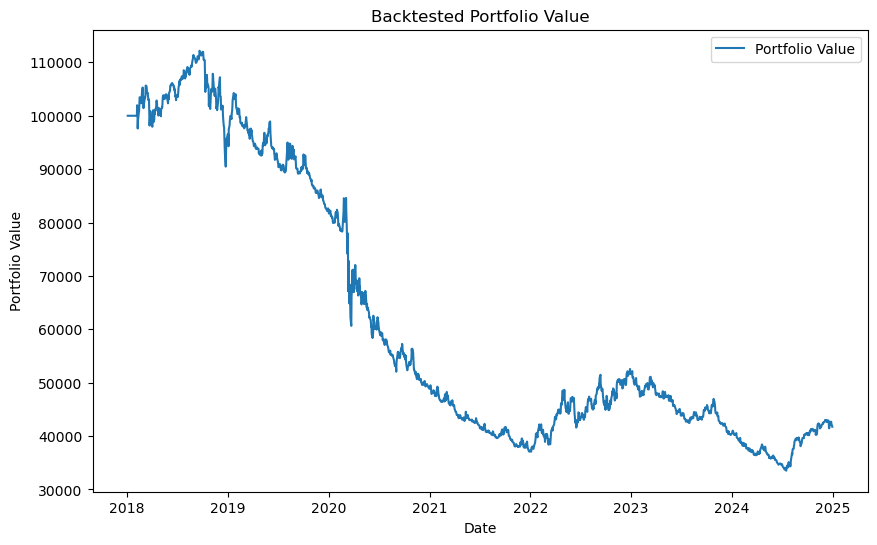

In [11]:
# Plot the portfolio value over time
plt.figure(figsize=(10,6))
plt.plot(portfolio.index, portfolio, label="Portfolio Value")
plt.title("Backtested Portfolio Value")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()